#### **Interpret your models.**

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

#### **Abstract**
A critical feature of this dataset is the 'Attrition' variable, which indicates whether an employee has left the company, making it particularly valuable for understanding employee turnover. Additional variables provide insights into work-life balance, years at the company, years in the current role, and years since the last promotion, among others. This data set of variables can be used in analyzing various facets of employee engagement, job satisfaction, and organizational dynamics, making it a valuable resource for human resource analytics, predictive modeling for employee retention, and understanding the factors influencing employee attrition.

#### **Importing and Cleaning the Dataset**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=3b7b07f241955b197d2c1ecd4217f0bafef22add450b51ca163a06980d7f66b7
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
# Required Libraries
import pandas as pd
#linear algebra
import numpy as np
import math
import missingno as msno

#data tools
from copy import copy
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
import eli5
from eli5.sklearn import PermutationImportance

#plots
import matplotlib.pyplot as plt

#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Shap
import shap

#metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score


%matplotlib inline

In [ ]:
# reading a dataframe using pandas
df = pd.read_csv("https://raw.githubusercontent.com/akularus/INFO_6105_Data_Science_Engineering_Methods/main/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split


#### **Datatypes:**
* Age - Integer value representing the age of the employee.
* Attrition - Categorical variable (object datatype) indicating whether the employee has left the company ('Yes' or 'No')
* BusinessTravel - Categorical variable (object datatype) indicating the frequency of business travel
* DailyRate - Integer value representing the daily rate for the employee.
* Department - Categorical variable (object datatype) indicating the department where the employee works
* DistanceFromHome - Integer value indicating the distance from work to home
* Education - Integer value representing the education level of the employee.
* EducationField - Categorical variable (object datatype) indicating the field of education
* EmployeeCount - Integer value, likely a constant value across the dataset, representing the count of employees.
* EmployeeNumber - Integer value uniquely identifying each employee.
* EnvironmentSatisfaction - Integer value representing the level of satisfaction with the work environment.
* Gender - Categorical variable (object datatype) indicating the gender of the employee
* HourlyRate - Integer value representing the hourly rate of the employee.
* JobInvolvement - Integer value indicating the level of job involvement.
* JobLevel - Integer value representing the level of the job position.
* JobRole - Categorical variable (object datatype) indicating the role/job title of the employee.
* JobSatisfaction - Integer value indicating the level of job satisfaction.
* MaritalStatus - Categorical variable (object datatype) indicating the marital status of the employee
* MonthlyIncome - Integer value representing the monthly income of the employee.
* MonthlyRate - Integer value representing the monthly rate of the employee.
NumCompaniesWorked - Integer value indicating the number of companies the employee has worked at.
* Over18 - Categorical variable (object datatype) indicating if the employee is over 18 years of age.
* OverTime - Categorical variable (object datatype) indicating whether the employee works overtime ('Yes' or 'No').
* PercentSalaryHike - Integer value representing the percentage increase in salary.
* PerformanceRating - Integer value indicating the performance rating of the employee.
* RelationshipSatisfaction - Integer value indicating the level of satisfaction with interpersonal relationships at work.
* StandardHours - Integer value, likely a constant value across the dataset, representing standard working hours.
* StockOptionLevel - Integer value indicating the level of stock options.
* TotalWorkingYears - Integer value representing the total number of years the employee has worked.
* TrainingTimesLastYear - Integer value indicating the number of times the employee received training last year.
* WorkLifeBalance - Integer value indicating the level of work-life balance.
* YearsAtCompany - Integer value representing the number of years the employee has been with the company.
* YearsInCurrentRole - Integer value indicating the number of years in the current role.
* YearsSinceLastPromotion - Integer value indicating the number of years since the last promotion.
* YearsWithCurrManager - Integer value representing the number of years with the current manager.



#### **Missing Values**

In [ ]:
#checking if the any data is missing
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

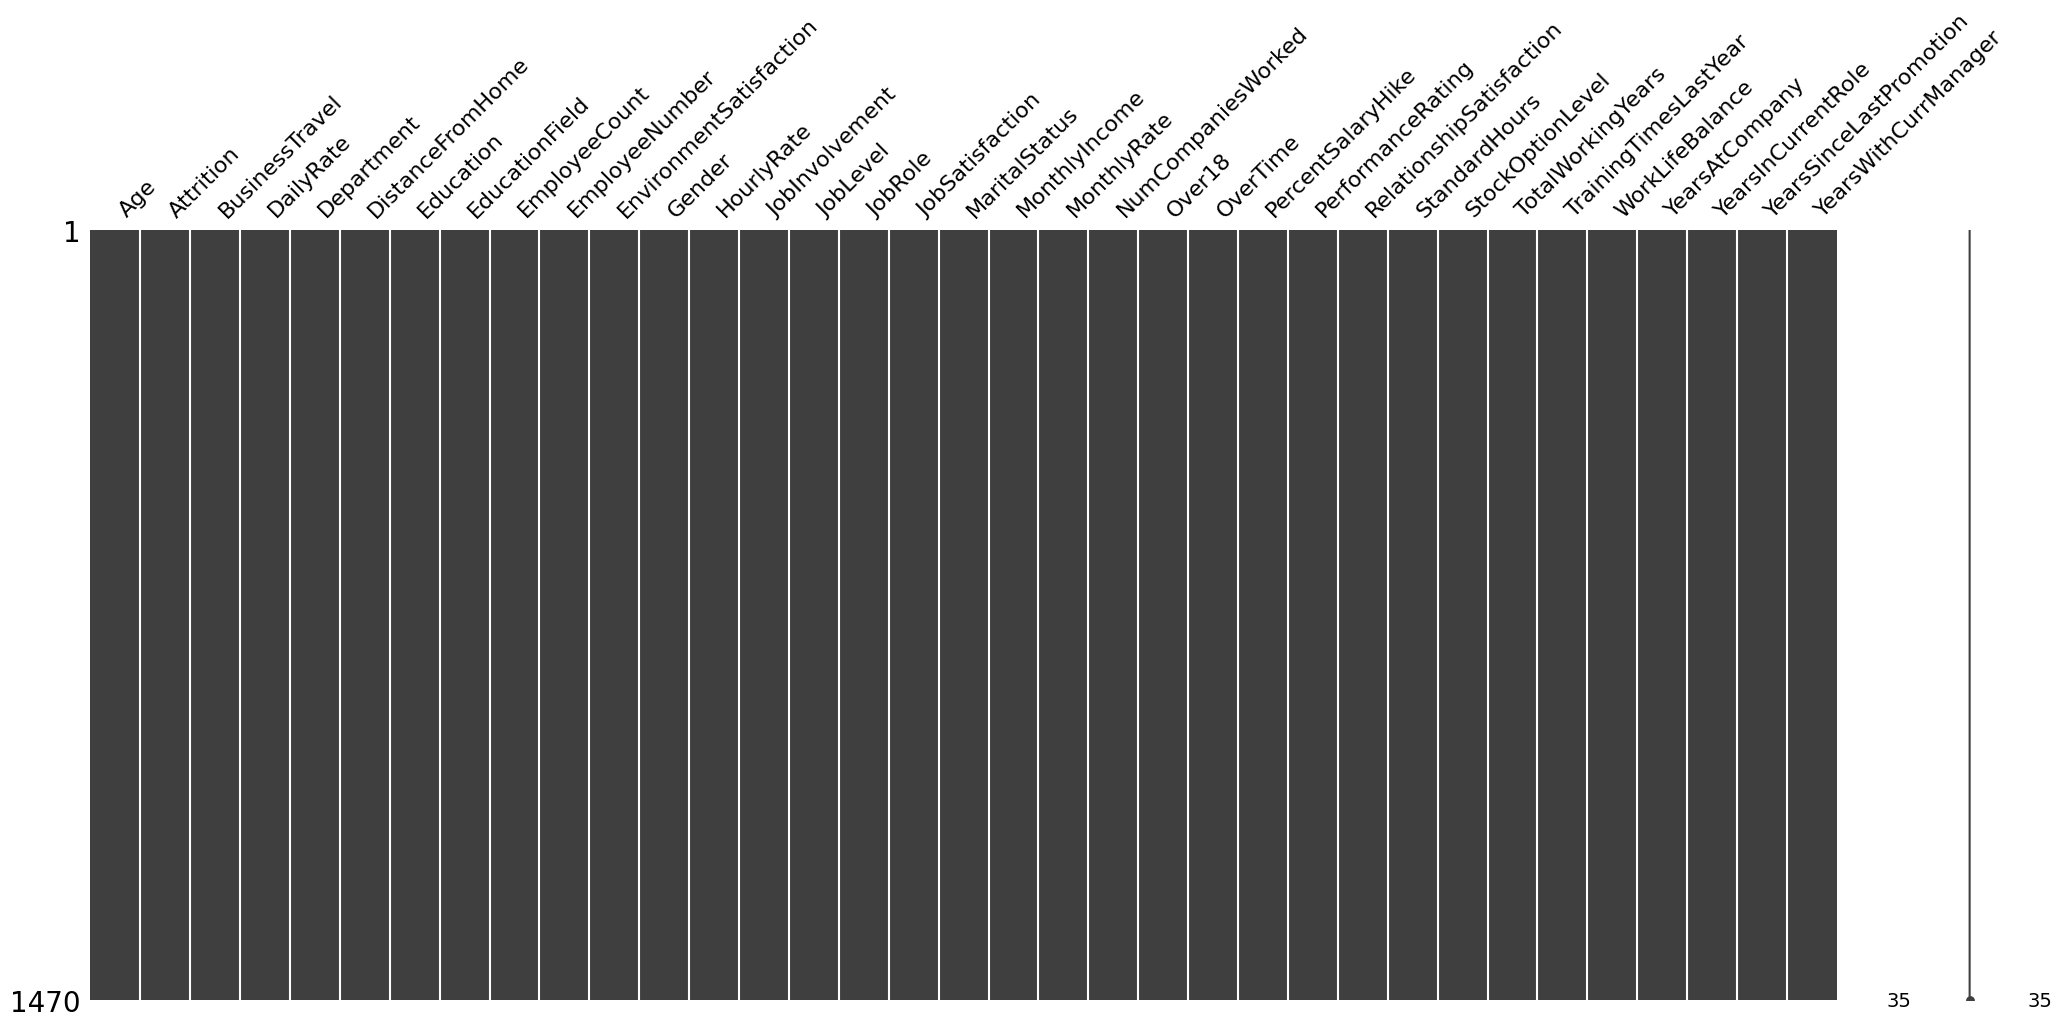

In [ ]:
msno.matrix(df)

It can be observed that there are no missing records.

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
# This gives information about dataset like column data types, column labels, number of columns,
# number of cell in each column which are not null, range index
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### **Converting Categorical values to Numerical values**

In [ ]:
#converting the categorical values of gender and country to numerical values
#df = pd.get_dummies(df, prefix='Is', drop_first=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df.columns:
    # Fit the label encoder to the dataframe column
    le.fit(df[column])
    # Replace the dataframe column with the encoded values
    df[column] = le.transform(df[column])

print(df)

      Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      23          1               2        624           2                 0   
1      31          0               1        113           1                 7   
2      19          1               2        805           1                 1   
3      15          0               1        820           1                 2   
4       9          0               2        312           1                 1   
...   ...        ...             ...        ...         ...               ...   
1465   18          0               1        494           1                22   
1466   21          0               2        327           1                 5   
1467    9          0               2         39           1                 3   
1468   31          0               1        579           2                 1   
1469   16          0               2        336           1                 7   

      Education  EducationF

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
target = df["Attrition"]

In [ ]:
target.shape

(1470,)

Storing the target feature into target dataframe and it is observed that there are 1470 records.

In [ ]:
features = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
    'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
    'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [ ]:
features.shape

(1470, 24)

In [ ]:
datasetClean = pd.concat([features,target], axis = 1, join = 'inner')

This code line combines two Pandas dataframes, features and target, into a single dataframe datasetClean.

The pd.concat() function is used to concatenate (combine) the dataframes. The first argument of pd.concat() is a list of dataframes to concatenate, which in this case is [features, target]. The second argument, axis, specifies the axis along which to concatenate. Here, axis=1 means to concatenate the dataframes horizontally (i.e., adding columns).

The third argument, join, specifies the type of join to use. 'inner' means to perform an inner join, which will only include rows that have matching values in both dataframes.

Overall, this code line creates a new dataframe datasetClean that includes all the columns from features and target, but only includes rows where there is a match on the churn column (which is the target variable in this case).

In [ ]:
datasetClean.shape

(1470, 25)

In [ ]:
df = df.reset_index()

So, after executing df = df.reset_index(), the DataFrame df will have a new index, starting from 0, that is sequential and without any missing values. This can be useful for indexing or joining with other DataFrames, or for restoring the original order of the DataFrame if the order was lost during some operations like sorting, filtering or removing rows.

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

So, after executing df.replace([np.inf, -np.inf], np.nan, inplace=True), any infinite values in the DataFrame df will be replaced with NaN and the changes will be made to the original DataFrame df.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [ ]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1097,6,159,20,1,1097,2,27,1,0,0,...,0,1,3,2,3,2,1,1,0,0
727,0,118,4,1,727,1,43,2,0,3,...,0,3,0,0,2,2,0,0,0,0
254,11,718,19,1,254,3,15,2,1,3,...,0,3,1,10,2,2,3,2,0,2
1175,21,245,11,2,1175,3,36,2,1,1,...,1,2,0,7,3,2,5,4,1,0
1341,13,135,19,2,1341,1,59,2,1,2,...,0,0,1,10,2,2,10,8,0,2


In [ ]:
y_train.shape

(1176,)

#### **1. Fit a linear model and interpret the regression coefficients**

**Linear Model**



In [ ]:
import statsmodels.api as sm

lin_reg = sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Attrition   R-squared (uncentered):                   0.235
Model:                            OLS   Adj. R-squared (uncentered):              0.219
Method:                 Least Squares   F-statistic:                              14.76
Date:                Sun, 17 Mar 2024   Prob (F-statistic):                    7.24e-52
Time:                        13:34:30   Log-Likelihood:                         -463.44
No. Observations:                1176   AIC:                                      974.9
Df Residuals:                    1152   BIC:                                      1097.
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0014      0.002     -0.832      0.406      -0.005       0.002
DailyRate                  6.31e-05   4.06e-05      1.552      0.121   -1.67e-05       0.000
DistanceFromHome             0.0050      0.001      3.856      0.000       0.002       0.008
Education                    0.0224      0.010      2.143      0.032       0.002       0.043
EmployeeNumber            5.144e-05   2.43e-05      2.120      0.034    3.83e-06     9.9e-05
EnvironmentSatisfaction     -0.0093      0.009     -0.977      0.329      -0.028       0.009
HourlyRate                   0.0012      0.001      2.286      0.022       0.000       0.002
JobInvolvement              -0.0144      0.014     -1.016      0.310      -0.042       0.013
JobLevel                    -0.0092      0.025     -0.373      0.709      -0.058       0.039
JobSatisfaction             -0.0108      0.009     -1.145      0.252      -0.029       0.008
MonthlyIncome               -0.0001   6.13e-05     -1.691      0.091      -0.000    1.66e-05
MonthlyRate               7.743e-05   2.53e-05      3.064      0.002    2.79e-05       0.000
NumCompaniesWorked           0.0240      0.005      5.039      0.000       0.015       0.033
PercentSalaryHike            0.0032      0.004      0.712      0.477      -0.006       0.012
PerformanceRating           -0.0146      0.046     -0.318      0.751      -0.105       0.076
RelationshipSatisfaction     0.0092      0.010      0.950      0.342      -0.010       0.028
StockOptionLevel            -0.0543      0.012     -4.376      0.000      -0.079      -0.030
TotalWorkingYears           -0.0045      0.003     -1.511      0.131      -0.010       0.001
TrainingTimesLastYear        0.0094      0.008      1.197      0.232      -0.006       0.025
WorkLifeBalance              0.0225      0.014      1.573      0.116      -0.006       0.051
YearsAtCompany               0.0105      0.004      2.727      0.006       0.003       0.018
YearsInCurrentRole          -0.0146      0.005     -2.956      0.003      -0.024      -0.005
YearsSinceLastPromotion      0.0118      0.004      2.735      0.006       0.003       0.020
YearsWithCurrManager        -0.0075      0.005     -1.516      0.130      -0.017       0.002
==============================================================================
Omnibus:                      260.542   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              453.998
Skew:                           1.465   Prob(JB):                     2.60e-99
Kurtosis:                       3.824   Cond. No.                     5.87e+03
==============================================================================

#### **Pointes to be noted:**
Considering the significance value of 0.05 according to the rule of thumb in statistics.

* Age has a p-value of 0.406, which is greater than the significance threshold of 0.05, hence it is a non-significant feature in predicting Attrition.
* DailyRate has a p-value of 0.121, which is greater than the significance threshold of 0.05, making it a non-significant feature in predicting Attrition.
* DistanceFromHome has a p-value of 0.000, which is lesser than the significance threshold of 0.05, making it a significant feature in predicting Attrition.
* Education has a p-value of 0.032, which is lesser than the significance threshold of 0.05, making it a significant feature in predicting Attrition.
* EmployeeNumber has a p-value of 0.034, which is lesser than the significance threshold of 0.05, making it a significant feature in predicting Attrition.
* EnvironmentSatisfaction has a p-value of 0.329, which is greater than the significance threshold of 0.05, hence it is a non-significant feature in predicting Attrition.
* HourlyRate has a p-value of 0.022, which is lesser than the significance threshold of 0.05, making it a significant feature in predicting Attrition.
* JobInvolvement has a p-value of 0.310, which is greater than the significance threshold of 0.05, hence it is a non-significant feature in predicting Attrition.
* JobLevel has a p-value of 0.709, which is greater than the significance threshold of 0.05, making it a non-significant feature in predicting Attrition.
* JobSatisfaction has a p-value of 0.252, which is greater than the significance threshold of 0.05, hence it is a non-significant feature in predicting Attrition.
* MonthlyRate has a p-value of 0.002, which is lesser than the significance threshold of 0.05, making it a significant feature in predicting Attrition.
* NumCompaniesWorked has a p-value of 0.000, which is lesser than the significance threshold of 0.05, making it a significant feature in predicting Attrition.
* StockOptionLevel has a p-value of 0.000, which is lesser than the significance threshold of 0.05, making it a significant feature in predicting Attrition.
* YearsAtCompany has a p-value of 0.006, which is lesser than the significance threshold of 0.05, making it a significant feature in predicting Attrition.
* YearsInCurrentRole has a p-value of 0.003, which is lesser than the significance threshold of 0.05, making it a significant feature in predicting Attrition.
* YearsSinceLastPromotion has a p-value of 0.006, which is lesser than the significance threshold of 0.05, making it a significant feature in predicting Attrition.

#### **Permutation Importance : Let's calculate Feature weights using Permutation Importance.**

In [ ]:
def get_permutation_importance(df):
    X = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
    'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
    'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
    'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager']]
    y = df[["Attrition"]]
    X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.10, random_state=1)
    # Create linear regression object
    model = linear_model.LinearRegression()
    model.fit(X_train,y_train)
    pi = PermutationImportance(model, random_state=1).fit(X_test, y_test)
    return eli5.show_weights(pi, feature_names = X_test.columns.tolist())

In [ ]:

get_permutation_importance(df)

Weight,Feature
0.0709 ± 0.0197,MonthlyIncome
0.0380 ± 0.0205,StockOptionLevel
0.0369 ± 0.0330,JobInvolvement
0.0235 ± 0.0061,NumCompaniesWorked
0.0222 ± 0.0102,EnvironmentSatisfaction
0.0195 ± 0.0063,JobSatisfaction
0.0177 ± 0.0139,YearsWithCurrManager
0.0164 ± 0.0151,Age
0.0156 ± 0.0066,TotalWorkingYears
0.0141 ± 0.0228,YearsInCurrentRole


#### **Observation**:
`MonthlyIncome` is the most important feature to predict the target variable `attrition` followed by `StockOptionLevel`, `JobInvolvement` and `NumCompainesWorked`.

In [ ]:
#Predicting the values
lr_pred = lin_reg.predict(X_test)

In [ ]:
#Checking accuracy of predictions
print('Linear Model - Test')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))
print('R2 %f' % r2_score(y_test, lr_pred))

Linear Model - Test
MAE: 0.246959
RMSE: 0.348669
R2 -0.056616


#### **2. Fit a tree-based model and interpret the nodes**

**Tree based Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(max_depth=3, random_state=1234)
DTree.fit(X_train,y_train)

DTree_score = DTree.score(X_test, y_test)
print(DTree_score)

0.013585678222382547


The code creates an instance of the DecisionTreeRegressor class named DTree. The max_depth parameter is set to 3, which limits the maximum depth of the decision tree to 3 levels. This helps prevent overfitting, which is when the model performs well on the training data but poorly on new, unseen data. The random_state parameter is set to 1234, which ensures that the results are reproducible.

Then, the fit() method is called on DTree to train the decision tree model using the training data X_train and y_train. X_train contains the input features (also called independent variables or predictors) for the training data, while y_train contains the corresponding target values (also called dependent variable or response variable).

After training the model, the code uses the score() method to evaluate the performance of the model on the test data. The score() method returns the coefficient of determination R^2 of the prediction, which is a measure of how well the model fits the test data. The higher the R^2 value, the better the model's performance.

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error
def model_sel(model):
    y_pred = model.predict(X_test)
    print("MODEL EVALUATION")
    print("\nr2_score of the model: ")
    print(r2_score(y_test,y_pred))

This code defines a function model_sel that takes a machine learning model as input, predicts the target values on a test dataset using the input model and prints the R-squared score as the model evaluation result. The R-squared score measures how well the model fits the data, with higher values indicating a better fit.

In [ ]:
# Model Evaluation on DecisionTreeRegressor
print("DECISION TREE REGRESSION: ")
print("-"*25)
model_sel(DTree)

DECISION TREE REGRESSION: 
-------------------------
MODEL EVALUATION

r2_score of the model: 
0.013585678222382547


In [ ]:
prediction_tree = DTree.predict(X_test)

In [ ]:
#Checking accuracy of predictions
print('Decision tree')
print('MAE: %f'% mean_absolute_error(y_test, prediction_tree))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, prediction_tree)))
print('R2 %f' % r2_score(y_test, prediction_tree))

Decision tree
MAE: 0.233757
RMSE: 0.336887
R2 0.013586


The code below uses the plot_tree function from the sklearn.tree module to create a graphical representation of a decision tree model (DTree). The feature_names argument specifies the names of the features used in the model, and the filled argument indicates whether to color the nodes to indicate their impurity.

The resulting plot shows the decision tree with the root node at the top and subsequent nodes branching out below. Each node represents a decision based on a particular feature, with the branch to the left indicating the outcome when the feature meets the decision criterion and the branch to the right indicating the outcome when it does not.

The plot includes the squared_error and samples values for each node, as well as the value for the leaf nodes, which represents the predicted target value for that group of samples.

[Text(0.5, 0.875, 'TotalWorkingYears <= 1.5\nsquared_error = 0.14\nsamples = 1176\nvalue = 0.168'),
 Text(0.25, 0.625, 'DistanceFromHome <= 16.5\nsquared_error = 0.25\nsamples = 78\nvalue = 0.513'),
 Text(0.125, 0.375, 'Age <= 5.5\nsquared_error = 0.245\nsamples = 63\nvalue = 0.429'),
 Text(0.0625, 0.125, 'squared_error = 0.226\nsamples = 26\nvalue = 0.654'),
 Text(0.1875, 0.125, 'squared_error = 0.197\nsamples = 37\nvalue = 0.27'),
 Text(0.375, 0.375, 'EmployeeNumber <= 24.5\nsquared_error = 0.116\nsamples = 15\nvalue = 0.867'),
 Text(0.3125, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.4375, 0.125, 'squared_error = 0.066\nsamples = 14\nvalue = 0.929'),
 Text(0.75, 0.625, 'StockOptionLevel <= 0.5\nsquared_error = 0.123\nsamples = 1098\nvalue = 0.144'),
 Text(0.625, 0.375, 'JobSatisfaction <= 0.5\nsquared_error = 0.176\nsamples = 448\nvalue = 0.228'),
 Text(0.5625, 0.125, 'squared_error = 0.24\nsamples = 88\nvalue = 0.398'),
 Text(0.6875, 0.125, 'squared_error = 0.1

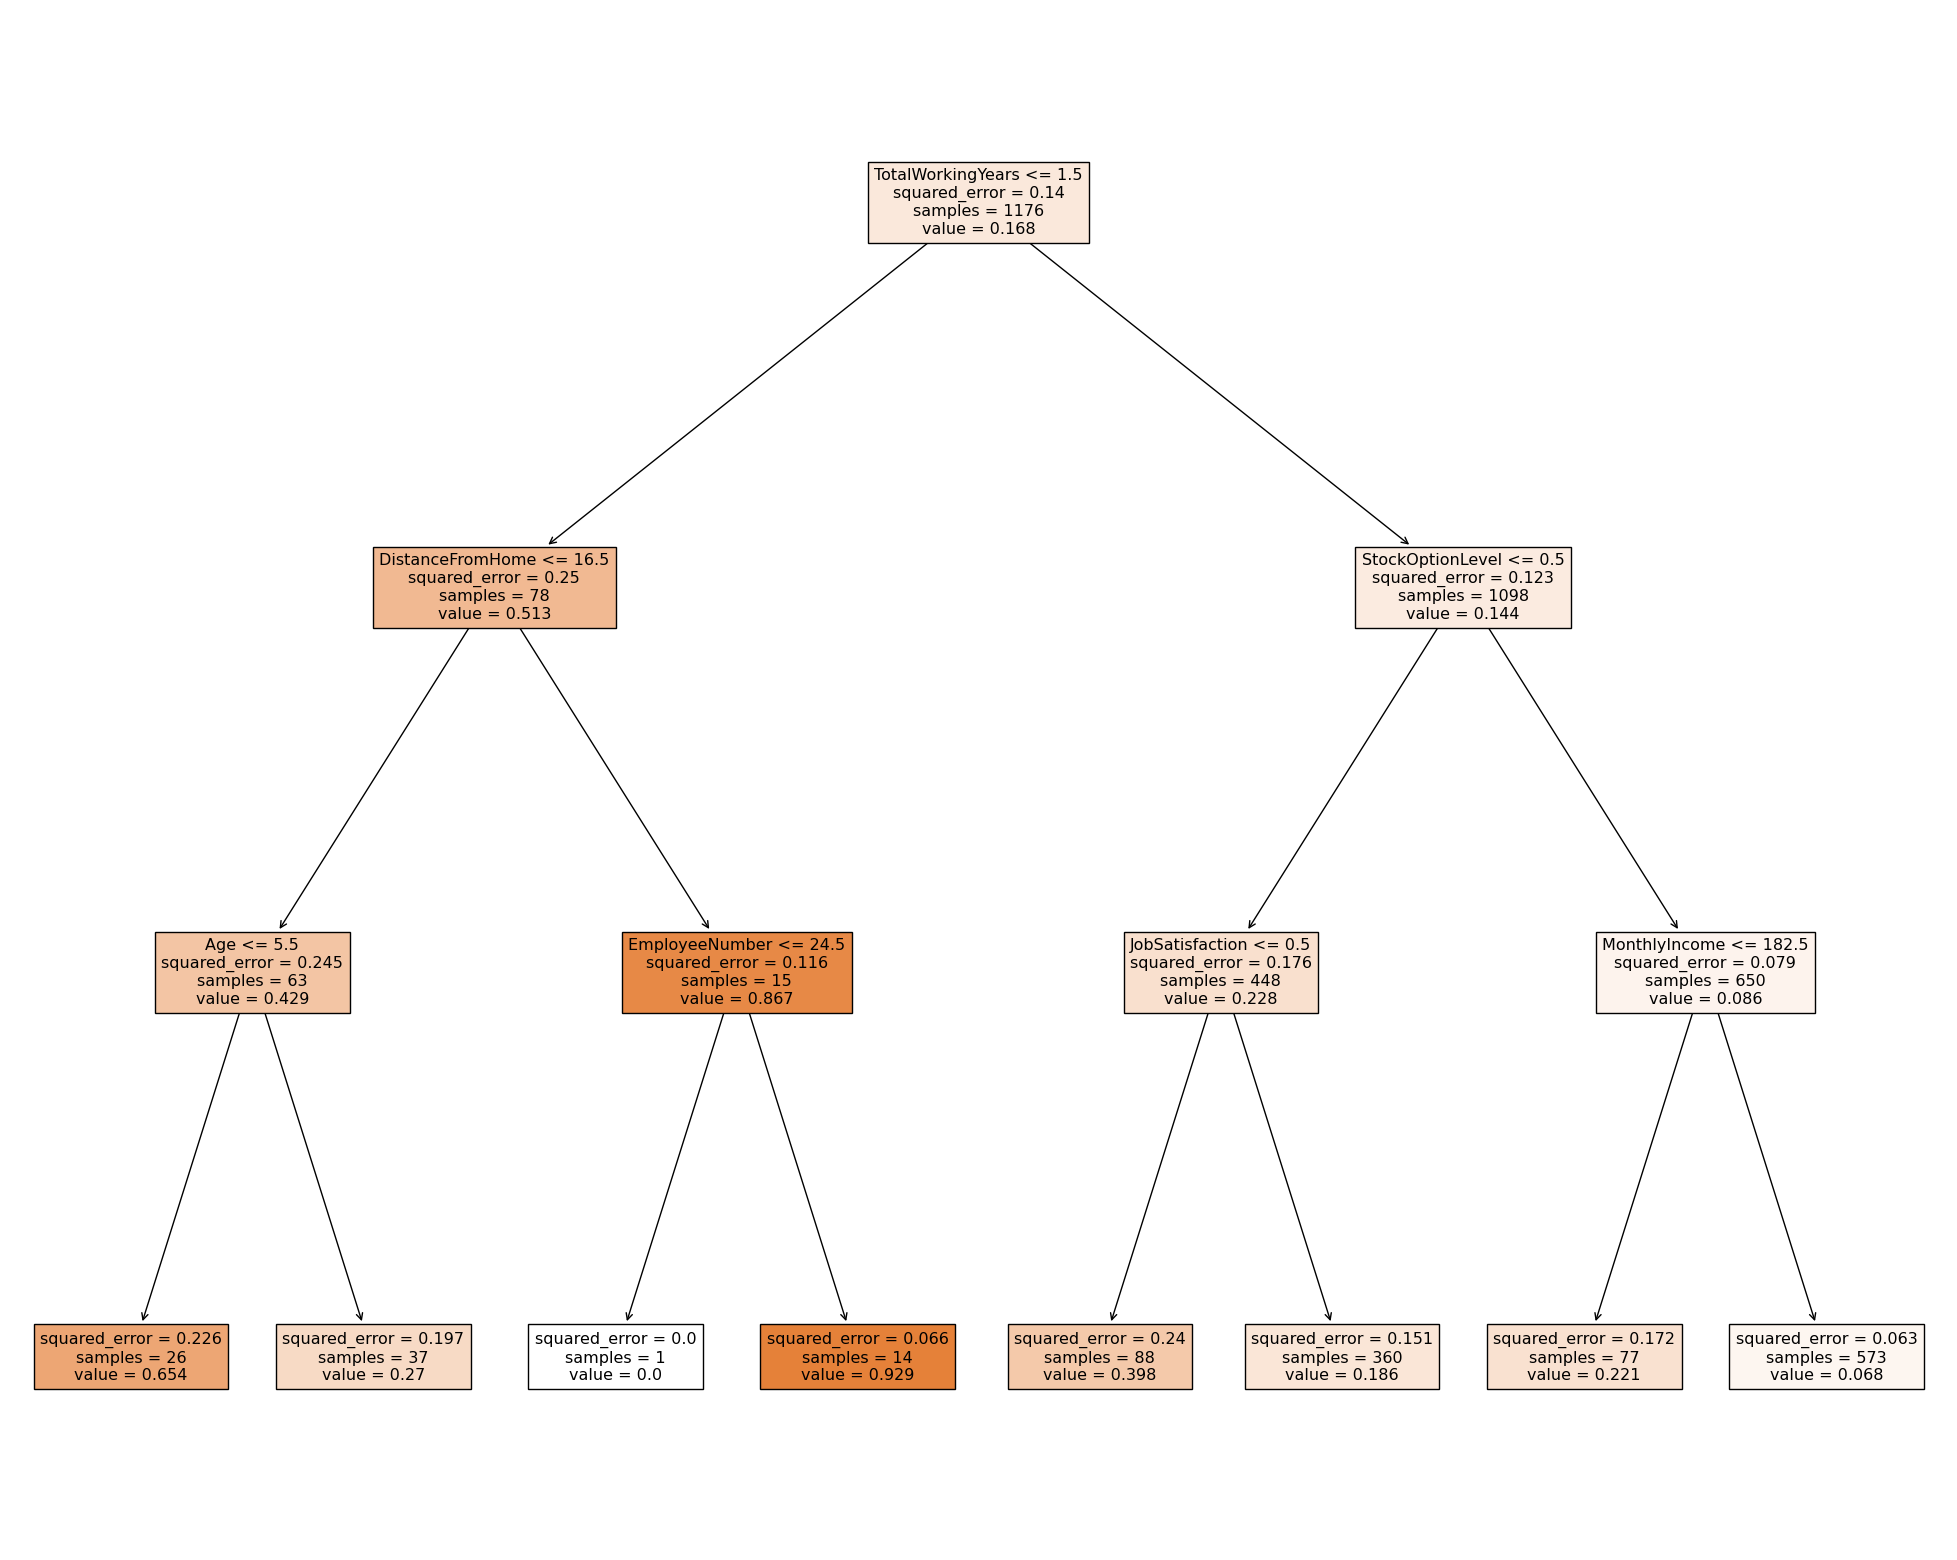

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
tree.plot_tree(DTree, feature_names= features.columns, filled=True)

The max_depth of the tree is set at 3. With each note, the data is being split into smaller subset. Node 0 has all samples of the dataset, but it'll be lower by the Node 3. Node 0 - TotalWorkingYears - took 1176 samples to arrive at value of 0.168. Node 2 and Node 3 - DistanceFromHome,  StockOptionLevel - took 78 and 1098 samples to set a bracket for age, EmployeeNumberJobSatisfaction and MonthlyIncome and further the leaves of the tree has a bracket for mse, wherein each mse bracket is given a value.

#### **3. Use auto ml to find the best model**

#### **AutoML**

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 4.0 MB/s eta 0:00:00


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp8nhr0b3u
  JVM stdout: /tmp/tmp8nhr0b3u/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp8nhr0b3u/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_xqbw9c
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
df_autom = h2o.import_file('https://raw.githubusercontent.com/akularus/INFO_6105_Data_Science_Engineering_Methods/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# displaying top 5 rows of dataset
df_autom.head(5)

﻿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


####**Splitting train test and vailidation into 70:15:15 ratio**

In [ ]:
train,test,valid = df_autom.split_frame(ratios=[.7, .15])

In [ ]:
y = "Attrition"
x = df_autom.columns
x.remove(y)
x.remove("EmployeeCount")
x.remove("EmployeeNumber")

In [ ]:
print(df_autom.columns)

['\ufeffAge', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [ ]:
# Rename the column by removing the special character
df.rename(columns={df.columns[0]: 'Age'}, inplace=True)

# Verify the change
print(df.columns)

Index(['Age', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


#### **Initializes an H2O AutoML object.**
The command below initializes an H2O AutoML object with specific settings to limit the number of models built, exclude certain algorithms, and control the verbosity and cross-validation settings.

In [ ]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [ ]:
aml.train(x = x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |
14:09:06.622: Project: AutoML_5_20240317_140906
14:09:06.623: Cross-validation disabled by user: no fold column nor nfolds > 1.
14:09:06.623: Setting stopping tolerance adaptively based on the training frame: 0.030978910540439487
14:09:06.623: Build control seed: 10
14:09:06.623: training frame: Frame key: AutoML_5_20240317_140906_training_py_3_sid_b85b    cols: 35    rows: 1042  chunks: 8    size: 112582  checksum: 4340189622957615385
14:09:06.623: validation frame: Frame key: py_5_sid_b85b    cols: 35    rows: 214  chunks: 8    size: 85215  checksum: 4340483411859128023
14:09:06.623: leaderboard frame: Frame key: py_5_sid_b85b    cols: 35    rows: 214  chunks: 8    size: 85215  checksum: 4340483411859128023
14:09:06.623: blending frame: NULL
14:09:06.623: response column: Attrition
14:09:06.623: fold column: null
14:09:06.623: weights column: null
14:09:06.624: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w)

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_5_20240317_140906


GLM Model: summary
    family    link    regularization               lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    binomial  logit   Ridge ( lambda = 0.008946 )  nlambda = 30, lambda.max = 7.0499, lambda.min = 0.008946, lambda.1se = -1.0  51                            51                             30                      AutoML_5_20240317_140906_training_py_3_sid_b85b

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.08442020637176122
RMSE: 0.2905515554454342
LogLoss: 0.29439746089668883
AUC: 0.8660999965446944
AUCPR: 0.7028171745954391
Gini: 0.7321999930893888
Null degrees of freedom: 1041
Residual degrees of freedom: 990
Null deviance: 910.5465402929419
Residual deviance: 613.5243085086995
AIC: 717.5243085086995

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42754380125153413
       No    Yes    Error    Rate
-----  ----  -----  -------  -------------
No     856   21     0.0239   (21.0/877.0)
Yes    78    87     0.4727   (78.0/165.0)
Total  934   108    0.095    (99.0/1042.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.427544     0.637363  84
max f2                       0.178391     0.684861  204
max f0point5                 0.435381     0.735043  82
max accuracy                 0.435381     0.90595   82
max precision                0.932691     1         0
max recall                   0.00598432   1         391
max specificity              0.932691     1         0
max absolute_mcc             0.435381     0.605834  82
max min_per_class_accuracy   0.180916     0.8       202
max mean_per_class_accuracy  0.22608      0.801852  174
max tns                      0.932691     877       0
max fns                      0.932691     164       0
max fps                      0.000734225  877       399
max tps                      0.00598432   165       391
max tnr                      0.932691     1         0
max fnr                      0.932691     0.993939  0
max fpr                      0.000734225  1         399
max tpr                      0.00598432   1         391

Gains/Lift Table: Avg response rate: 15.83 %, avg score: 15.84 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0105566                   0.778293           6.31515    6.31515            1                0.862309    1                           0.862309            0.0666667       0.0666667                  531.515   531.515            0.0666667
2        0.0201536                   0.681146           6.31515    6.31515            1                0.720316    1                           0.794693            0.0606061       0.127273                   531.515   531.515            0.127273
3        0.0307102                   0.635459           5.74105    6.1178             0.909091         0.658285    0.96875                     0.747803            0.0606061       0.187879                   474.105 

####**Points Learnt:**
- Passing the input features `x` , output column `y` which is attrition and training dataframe `train` and valiation dataframe `valid` as input to the train function.
- Whenever it creates new model it updates the new leader like for `XGBoost` , `GLM`, `GBM` Gradient Boosting Model, Distributed Random Forest `DRF` and all the other models

#### **Training the AutoML with training data**
below, gives the leaderboard which has performance of models after training

In [ ]:
lb = aml.leaderboard

In [ ]:
best_model = aml.get_best_model()

In [ ]:
print(best_model)

Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_5_20240317_140906


GLM Model: summary
    family    link    regularization               lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    binomial  logit   Ridge ( lambda = 0.008946 )  nlambda = 30, lambda.max = 7.0499, lambda.min = 0.008946, lambda.1se = -1.0  51                            51                             30                      AutoML_5_20240317_140906_training_py_3_sid_b85b

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.08442020637176122
RMSE: 0.2905515554454342
Lo

**Observations:**
* The best-performing model, according to the output, is GLM model with the model key GLM_1_AutoML_3_20240220_24435.
* OverTime.No: This feature has the highest relative importance, indicating that whether an employee does not work overtime significantly impacts the prediction of attrition. The absence of overtime work could be associated with lower attrition rates.
* MaritalStatus.Single: Being single is identified as an important predictor of attrition. This could imply that single employees might have different career priorities or life circumstances affecting their job stability compared to married employees.
* AUC (Area under ROC curve)threshold is 0.866 for train data and 0.8401 for validation data. The Training AUC of 0.866 suggests that the model has a high ability to correctly classify the training dataset instances. It shows that, on the training data, the model can distinguish well between employees who leave and those who stay.


In [ ]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_1_20240317_134924,0.79233,0.393363,0.594313,0.266107,0.344159,0.118445
GLM_2_AutoML_2_20240317_135031,0.79233,0.393363,0.594313,0.266107,0.344159,0.118445
GBM_7_AutoML_2_20240317_135031,0.76498,0.430363,0.519981,0.242352,0.360855,0.130216
GBM_3_AutoML_1_20240317_134924,0.76498,0.430363,0.519981,0.242352,0.360855,0.130216
XRT_2_AutoML_2_20240317_135031,0.761455,0.424481,0.463121,0.280911,0.36687,0.134593
XRT_1_AutoML_1_20240317_134924,0.761455,0.424481,0.463121,0.280911,0.36687,0.134593
DRF_2_AutoML_2_20240317_135031,0.75074,0.419292,0.481202,0.300437,0.36126,0.130509
DRF_1_AutoML_1_20240317_134924,0.75074,0.419292,0.481202,0.300437,0.36126,0.130509
GBM_1_AutoML_1_20240317_134924,0.749612,0.420624,0.510802,0.301071,0.3603,0.129816
GBM_5_AutoML_2_20240317_135031,0.749612,0.420624,0.510802,0.301071,0.3603,0.129816


#### **Generalized Linear Modeling is the best model.**

#### **4. Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.**

#### **Shap Analysis**

The technique called SHAP (SHapley Additive exPlanations), created by Lundberg and Lee in 2017, is used to clarify specific predictions. It relies on the most efficient Shapley values from game theory to do this. SHAP's objective is to determine how each feature adds to the prediction of an instance x. By using coalitional game theory, the SHAP explanation method calculates Shapley values.

In [ ]:
!pip3 install shap

In [ ]:
import shap

#### **1. Shap Analysis of the Linear Model**

/usr/local/lib/python3.10/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


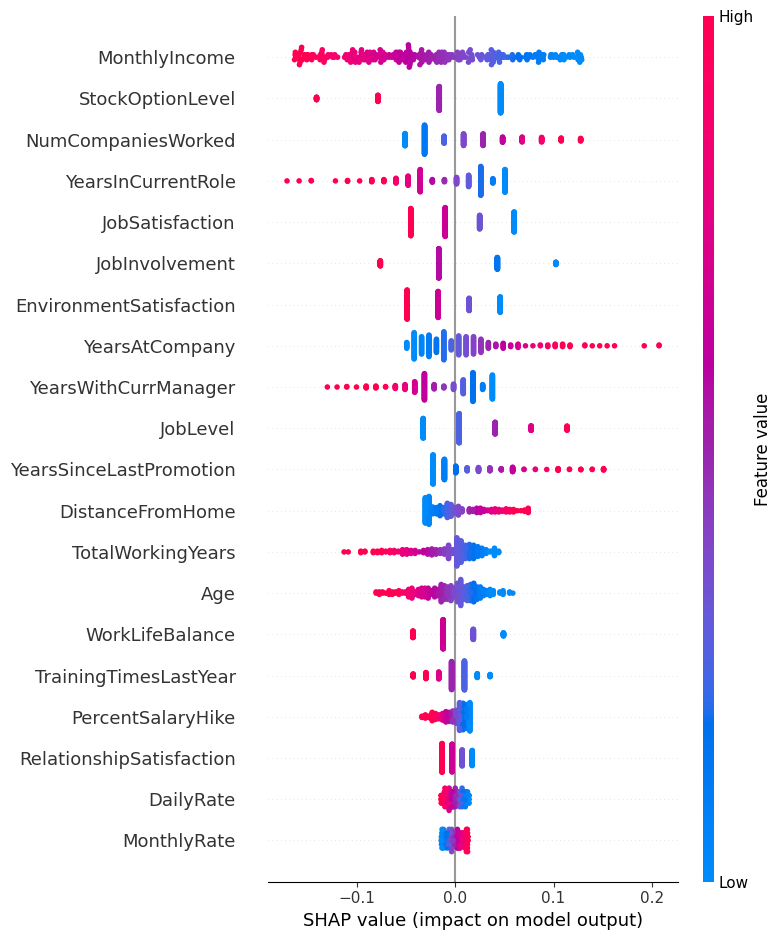

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

explainer_sh = shap.LinearExplainer(lin_reg, X_train, feature_perturbation='interventional',feature_names=features.columns)
shap_values_lg = explainer_sh.shap_values(X_test)
shap.summary_plot(shap_values_lg, X_test, feature_names=features.columns)

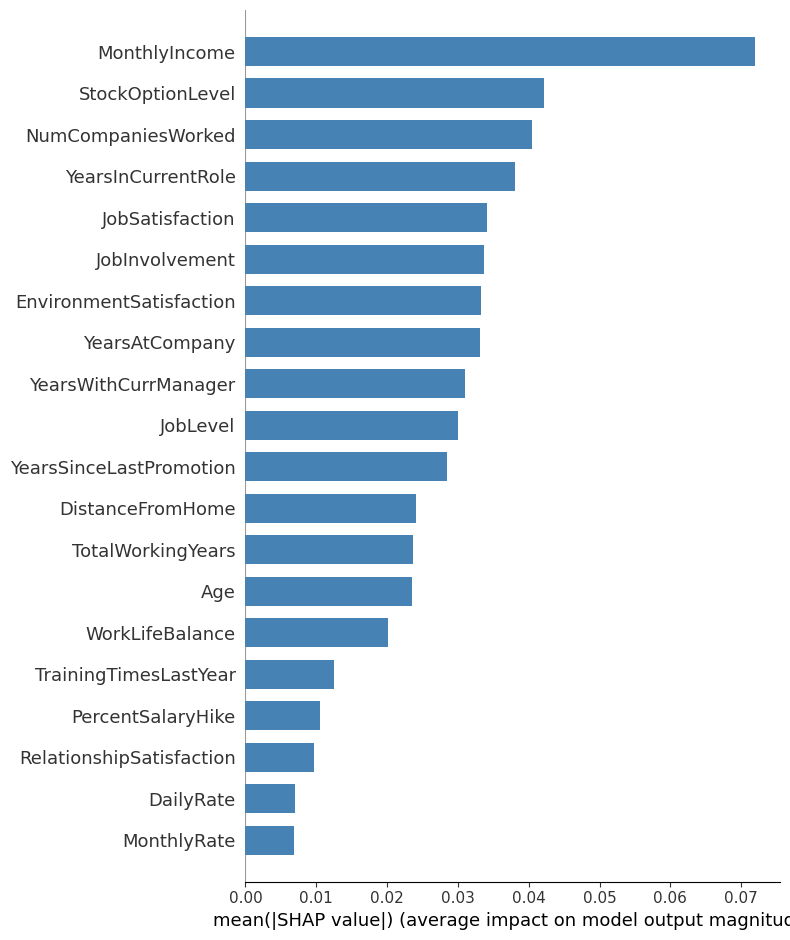

In [ ]:
shap.summary_plot(shap_values_lg, X_train, plot_type="bar", color='steelblue')

#### **2. Tree Model - Shap Analysis**

In [ ]:
explainer_tree = shap.Explainer(DTree)
shap_values_tree = explainer_tree(X_test)

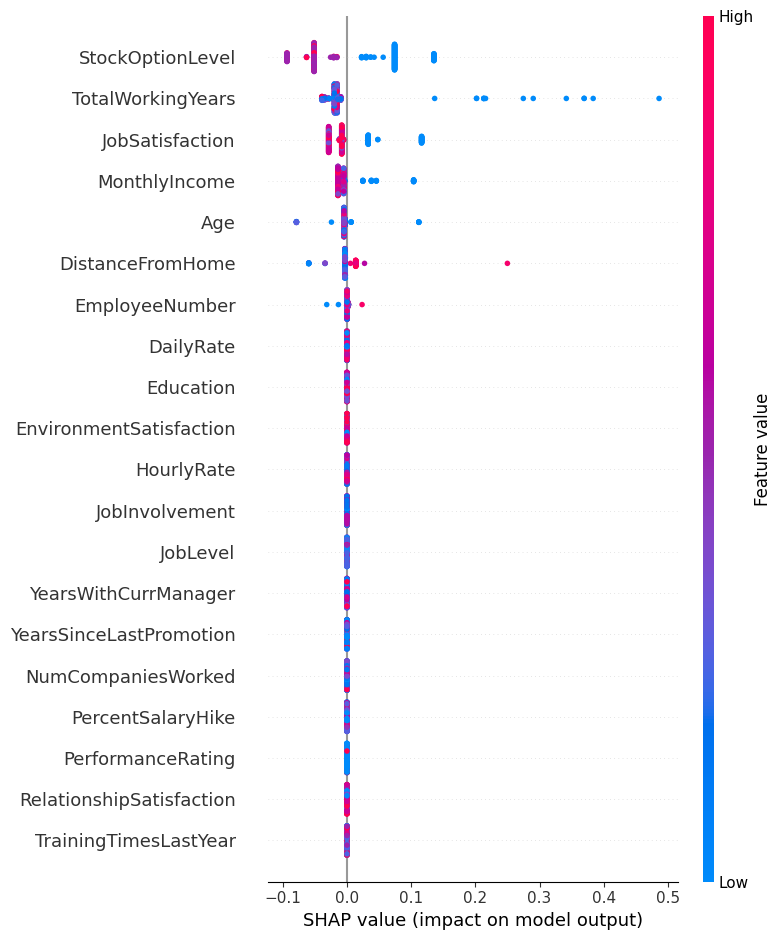

In [ ]:
shap.summary_plot(shap_values_tree, X_test, feature_names=features.columns)

#### **3. AutoML - Shap Analysis**
AutoML has it's on shap analysis method built into the package since the SHAP package has no native support for the models on AutoML.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GLM_1_AutoML_5_20240317_140906,0.849639,0.291999,0.627319,0.189406,0.292405,0.0855006,216,0.028047,GLM
GBM_1_AutoML_5_20240317_140906,0.824608,0.314995,0.61636,0.279922,0.30157,0.0909442,289,0.227282,GBM
XGBoost_1_AutoML_5_20240317_140906,0.820025,0.308939,0.602188,0.239996,0.296476,0.0878982,568,0.069738,XGBoost
GBM_2_AutoML_5_20240317_140906,0.816852,0.318754,0.505702,0.255861,0.306064,0.0936749,341,0.072374,GBM
XGBoost_3_AutoML_5_20240317_140906,0.798167,0.338987,0.514659,0.26159,0.312488,0.0976485,963,0.047806,XGBoost
GBM_4_AutoML_5_20240317_140906,0.787062,0.326081,0.537492,0.208003,0.304846,0.0929313,413,0.046263,GBM
XGBoost_2_AutoML_5_20240317_140906,0.786004,0.331706,0.53162,0.309448,0.308972,0.0954638,693,0.07317,XGBoost
GBM_3_AutoML_5_20240317_140906,0.760444,0.340355,0.503215,0.288119,0.311301,0.0969085,344,0.072163,GBM
DRF_1_AutoML_5_20240317_140906,0.748458,0.359107,0.479551,0.32831,0.323546,0.104682,451,0.085916,DRF
XRT_1_AutoML_5_20240317_140906,0.722193,0.380174,0.413364,0.352371,0.332874,0.110805,549,0.120881,DRF


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GLM_1_AutoML_5_20240317_140906

,No,Yes,Error,Rate
No,155.0,28.0,0.153,(28.0/183.0)
Yes,7.0,24.0,0.2258,(7.0/31.0)
Total,162.0,52.0,0.1636,(35.0/214.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

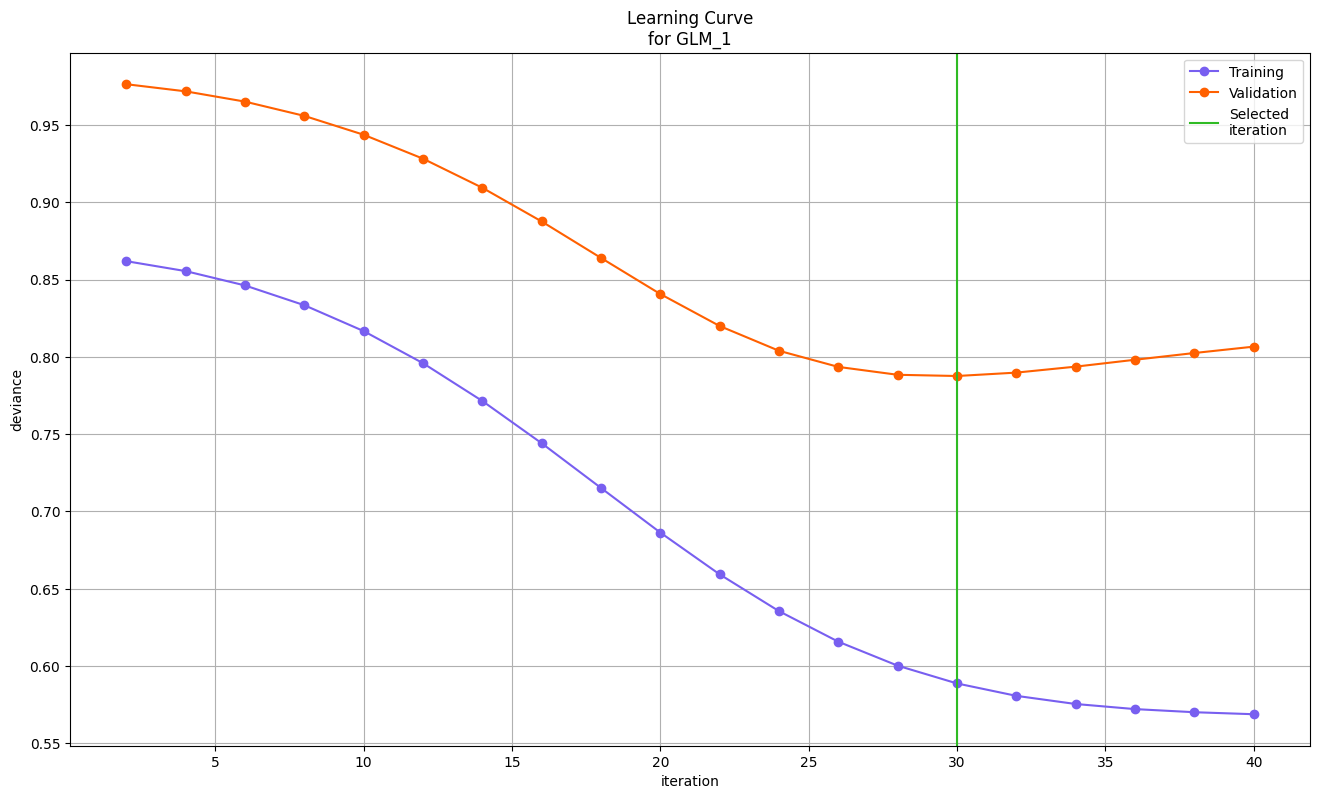

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

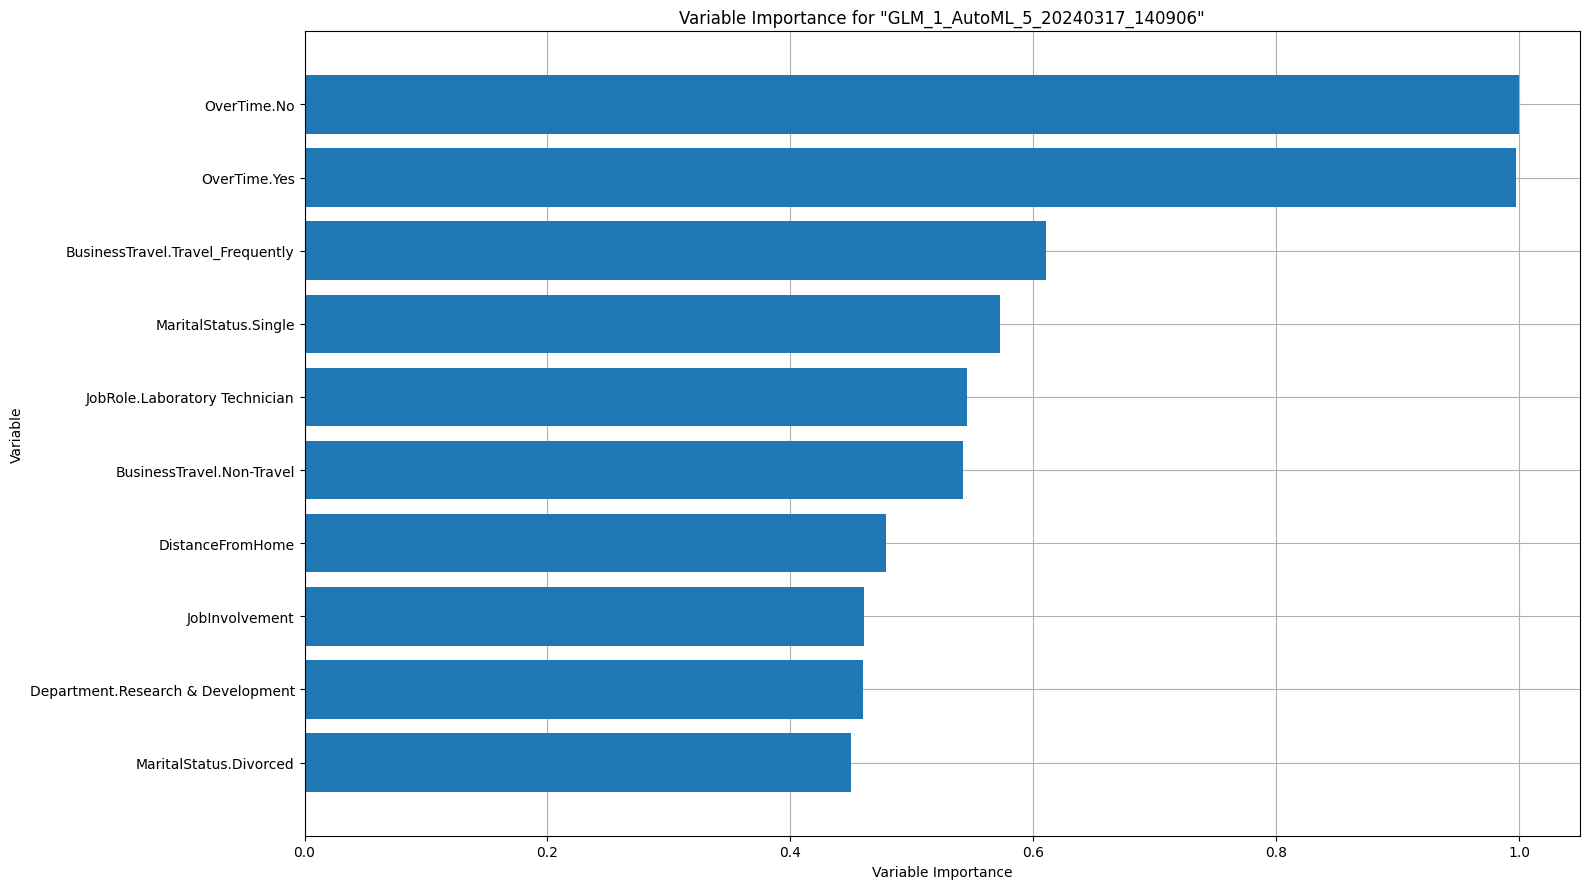

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

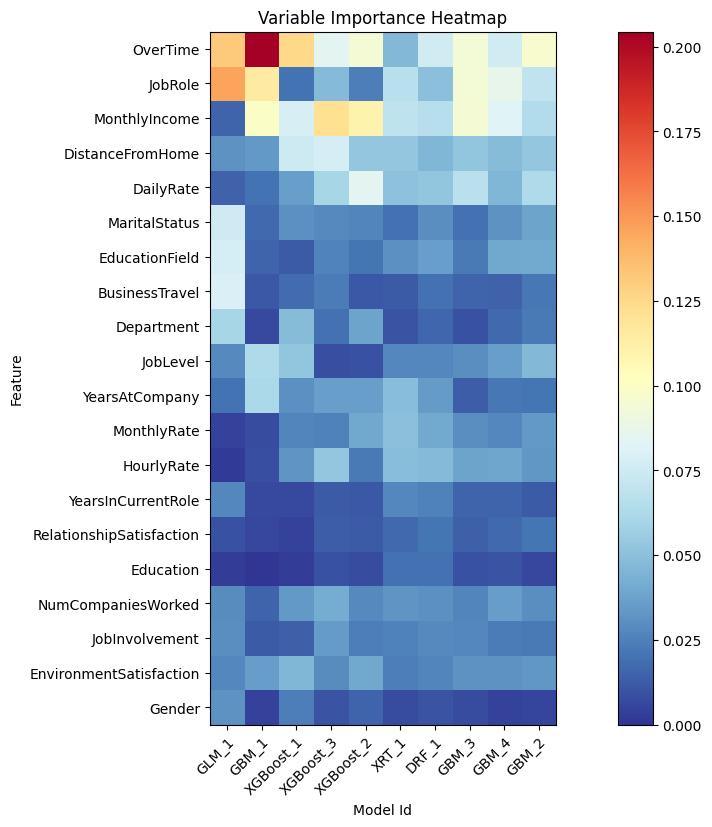

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

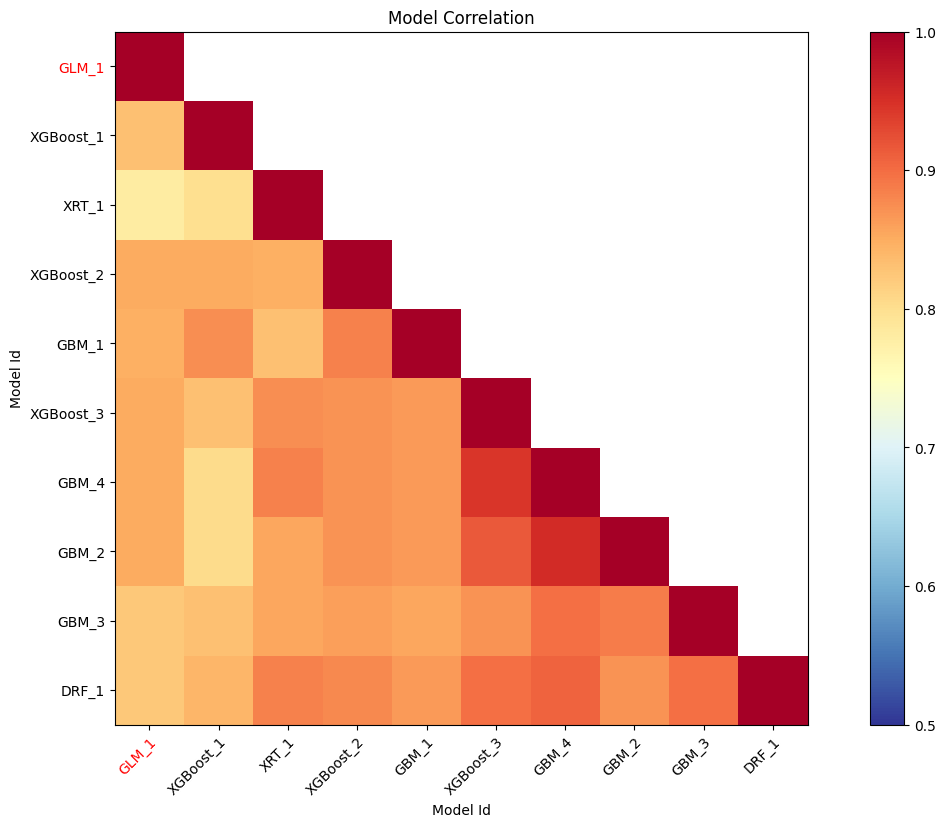

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

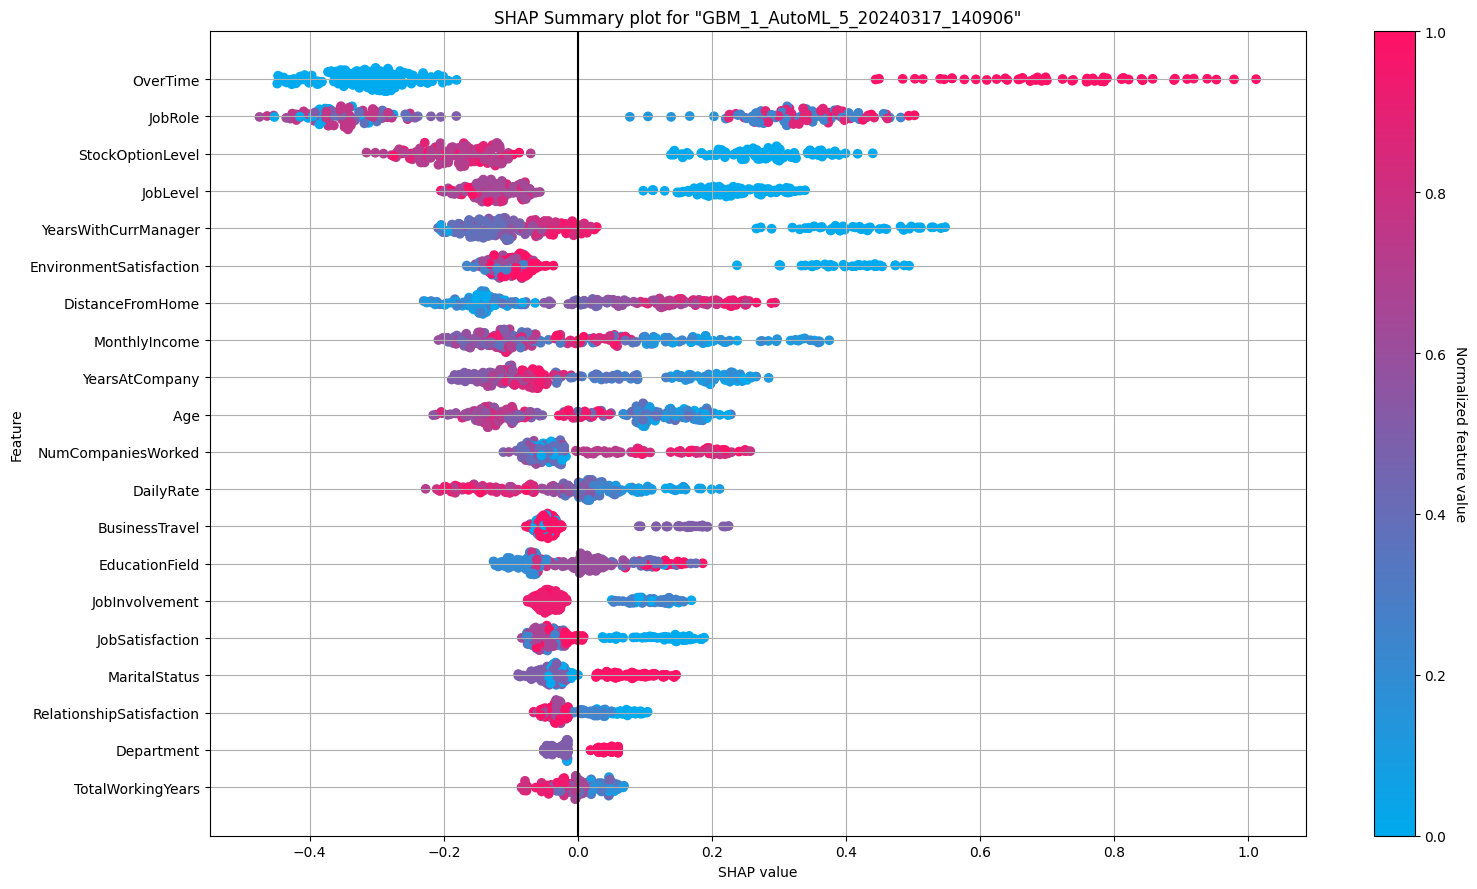

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

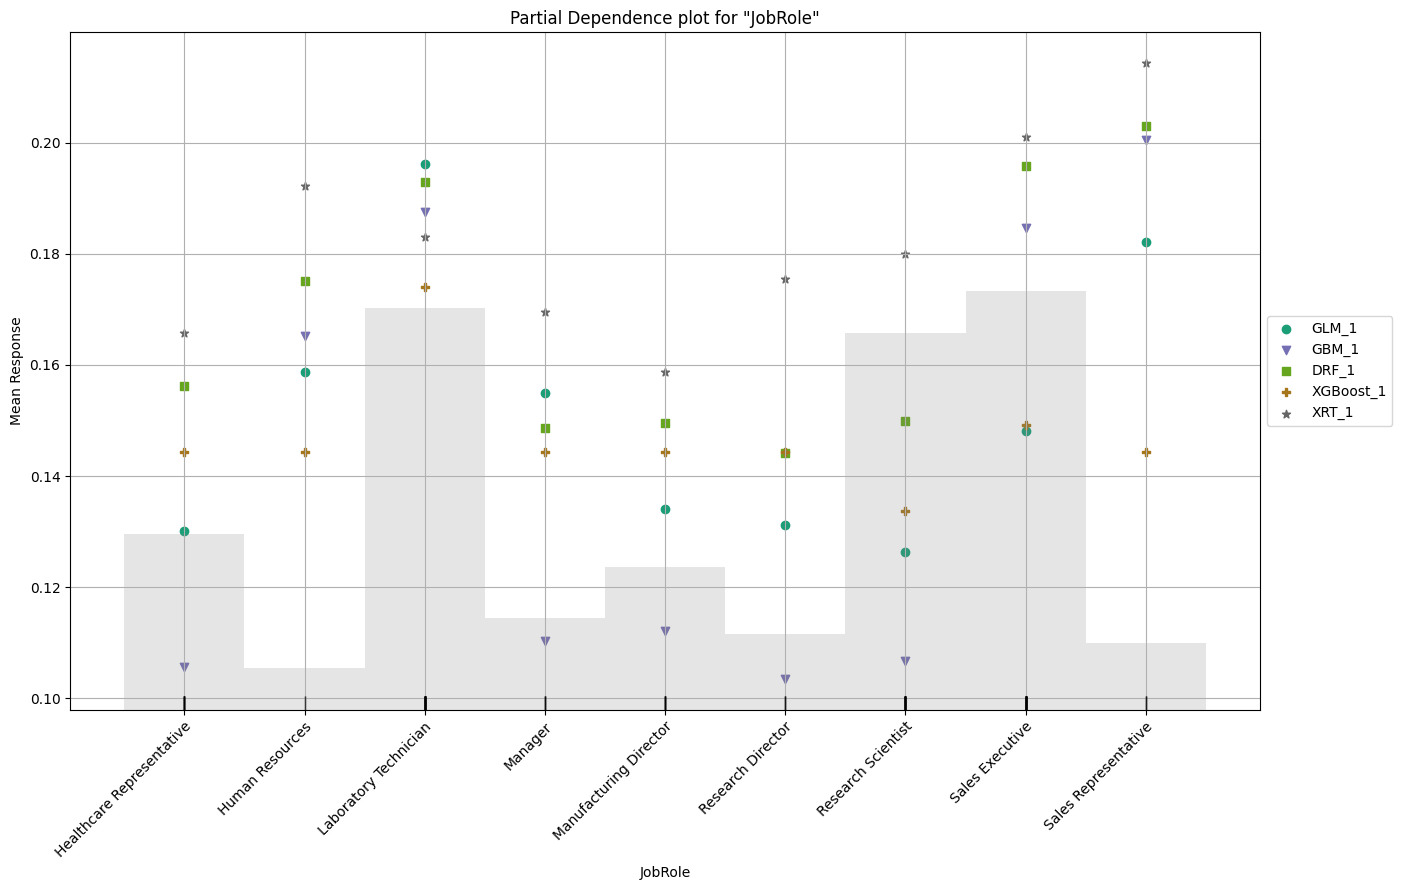

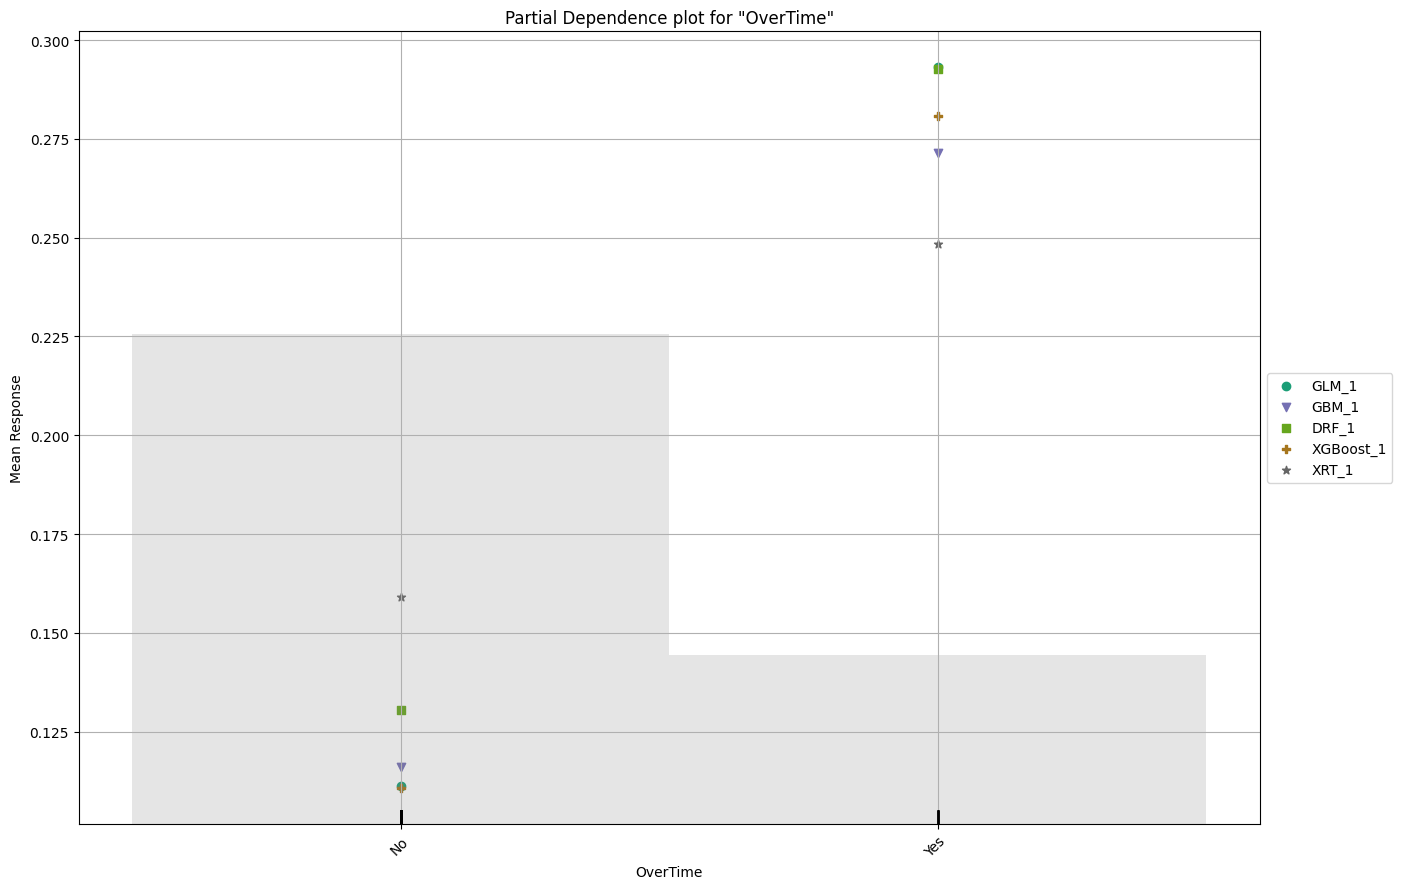

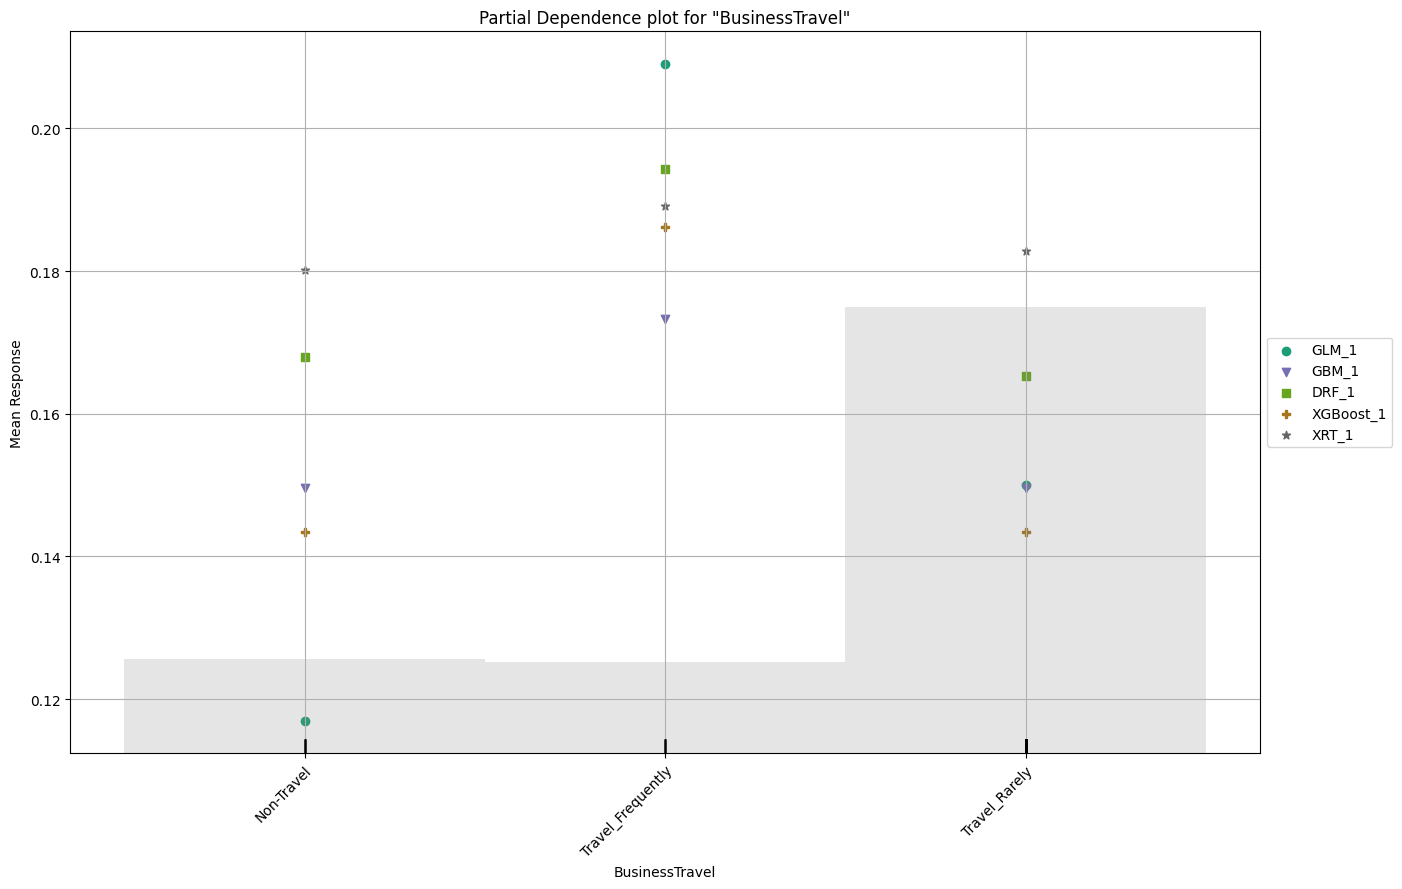

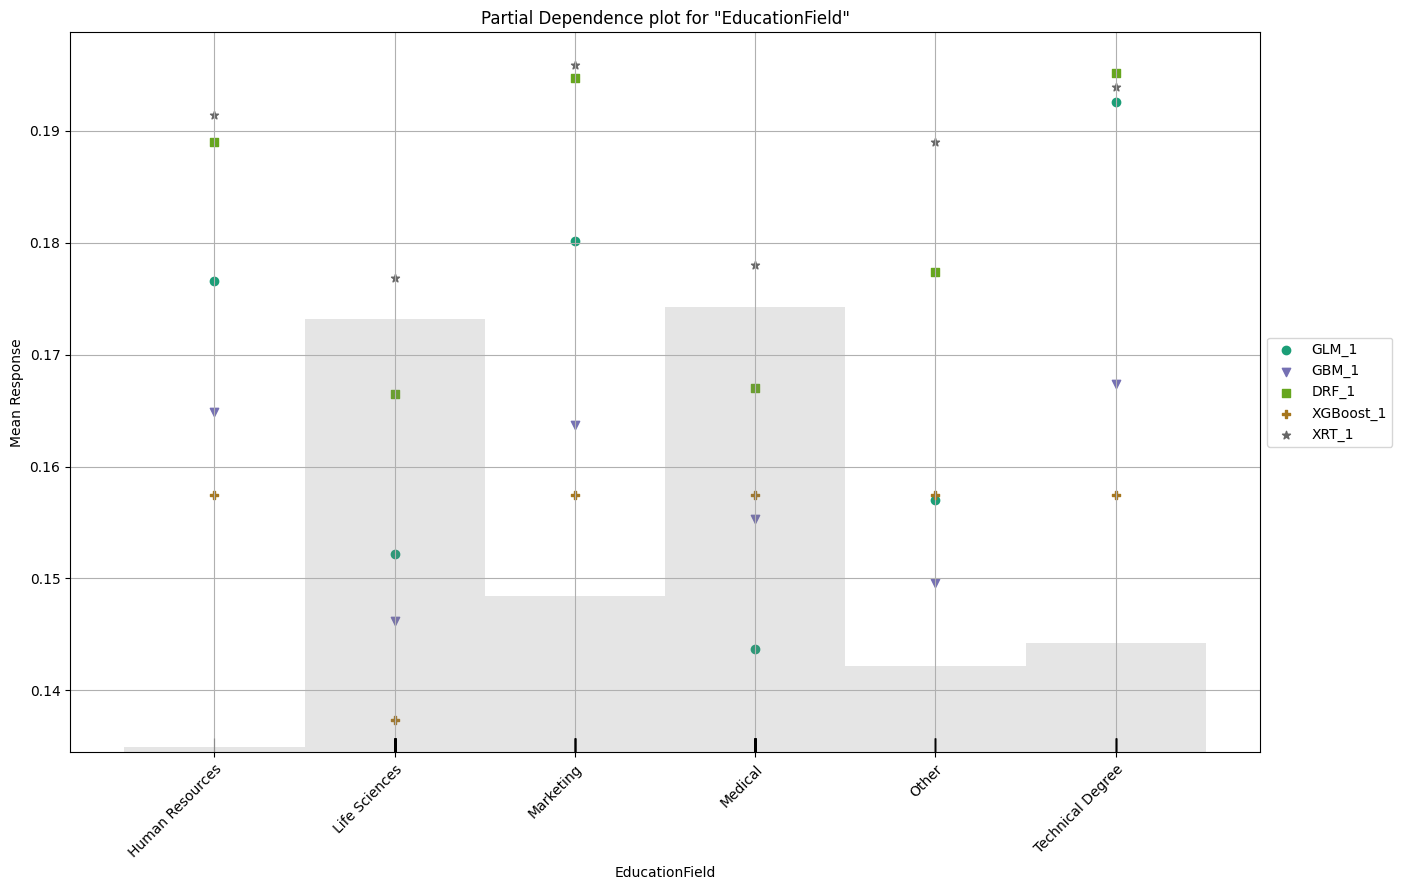

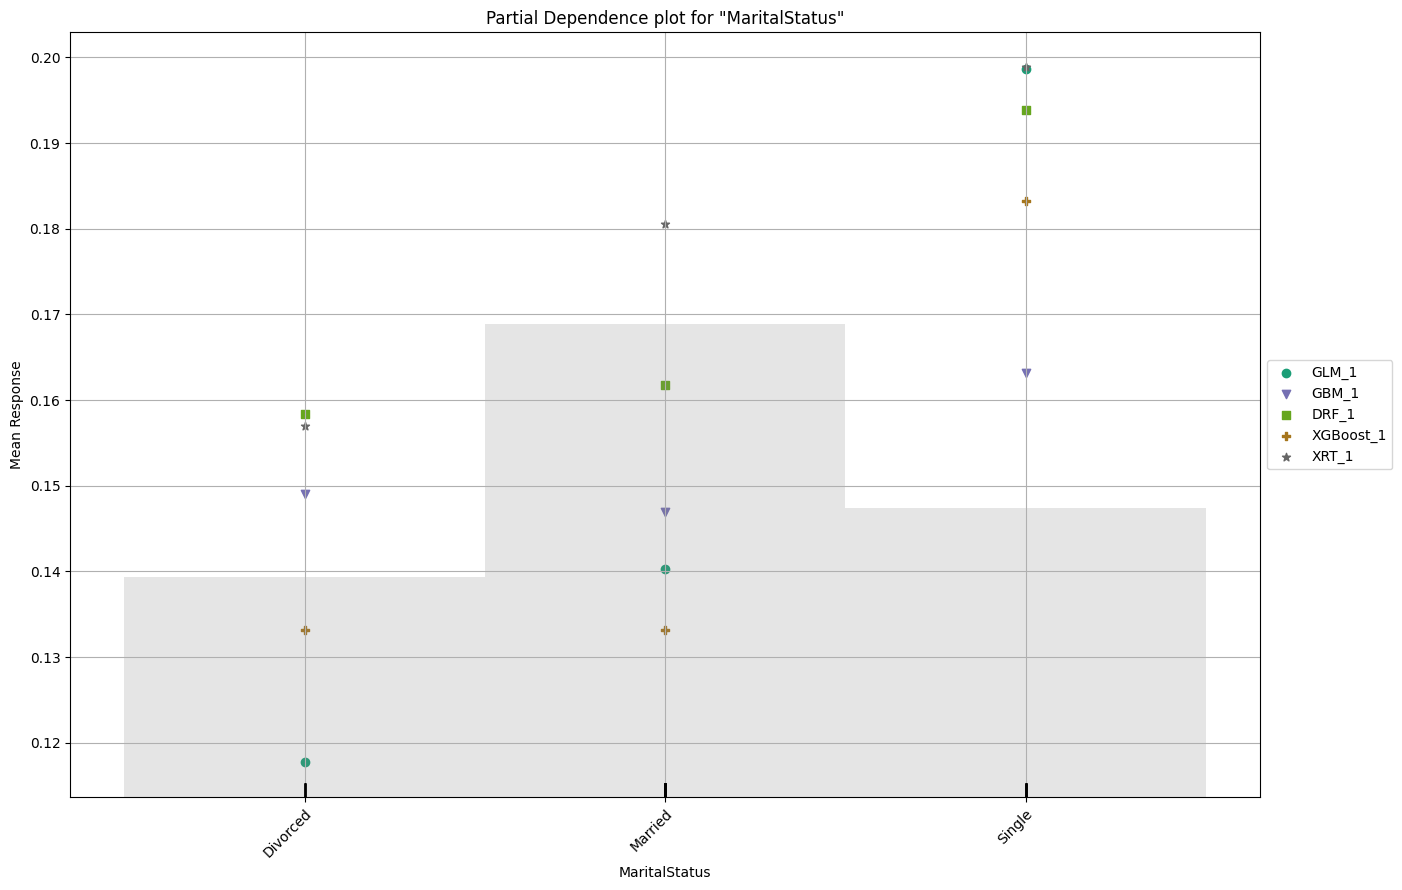

In [ ]:
exm = aml.explain(test)

### References:

1. H2O.ai documentation https://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html
2. H2O.ai notebook reference on a different dataset for classification https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/H2O_AutoML.ipynb#scrollTo=vOxeivTyUCeq
3. H2O.ai model explainability https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html
4. permutation importance is refered from scikit-learn permutation handling concept document https://scikit-learn.org/stable/modules/permutation_importance.html
5. modeling is refered from scikit-learn logistic regression officiakl documentatio
6. Outlier Imputation is refered from sklearn "logistic-regression-using-python-and-excel" explanation
7. Refered Kaggle contributions for oversampling
8. Outlier handling is referec from analytics vidhya outlier handling theoritical explanation https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/
9. Shap Analysis is refered from https://www.analyticsvidhya.com/blog/2021/11/model-explainability/

All other code and function implementation are independently written.


###Copyright

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.